# Exploratory Data Analysis 1

### Imports

In [1]:
import pandas as pd
import sys
import os

current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.preprocessing.data_cleaning import CountMissingValues, VisualizeMissingValues, DropMissingValues, TextCleaning, PreviewDataValues, DuplicateValues, DropDuplicateValues, TextRatingCleaning, WrongTextInDataframeCleaning
from src.visualization.eda_visualization import TextLengthDistribution, WordCountDistribution, CommonWordsDistribution

### Loading the data

In [2]:
data_path = '../data/raw/yelp.csv'
df = pd.read_csv(data_path)
df

,text,rating,date,location
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
8350,NaN,NaN,NaN,NaN
8351,NaN,NaN,NaN,NaN
8352,NaN,NaN,NaN,NaN
8353,NaN,NaN,NaN,NaN


### Preview The Data

In [3]:
display(PreviewDataValues().execute(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      522 non-null    object
 1   rating    1674 non-null   object
 2   date      899 non-null    object
 3   location  1584 non-null   object
dtypes: object(4)
memory usage: 261.2+ KB


(  text rating date location
 0  NaN    NaN  NaN      NaN
 1  NaN    NaN  NaN      NaN
 2  NaN    NaN  NaN      NaN
 3  NaN    NaN  NaN      NaN
 4  NaN    NaN  NaN      NaN,
 None,
                                                      text         rating  \
 count                                                 522           1674   
 unique                                                193              8   
 top     <span class=" raw__09f24__T4Ezm">299 Sussex St...  4 star rating   
 freq                                                  175            668   
 
                date           location  
 count           899               1584  
 unique          188                117  
 top     Dec 4, 2024  Sydney, Australia  
 freq             48                200  )

In [4]:
print(f"Duplicate rows: {DuplicateValues().execute(df)}")


Duplicate rows: 7624


In [5]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        7833
rating      6681
date        7456
location    6771
dtype: int64


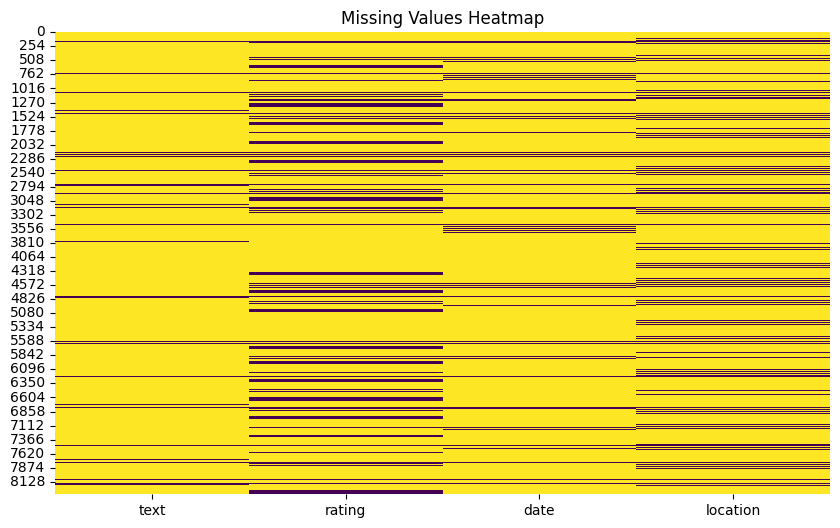

None


In [6]:
print(VisualizeMissingValues().execute(df))

### Initial Cleaning of the data

In [7]:
# Process the DataFrame
df = DropMissingValues().execute(df)

# Display the result
print(df)

                                                   text         rating  \
37    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
38    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
80    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
81    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
83    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
...                                                 ...            ...   
8179  <span class=" raw__09f24__T4Ezm" lang="en">If ...  4 star rating   
8191  <span class=" raw__09f24__T4Ezm" lang="en">Our...  5 star rating   
8203  <span class=" raw__09f24__T4Ezm" lang="en">I'v...  4 star rating   
8215  <span class=" raw__09f24__T4Ezm" lang="en">Exc...  4 star rating   
8235  <span class=" raw__09f24__T4Ezm" lang="en">Amb...  5 star rating   

              date                                           location  
37     Dec 4, 2024  I've tried a range 

In [8]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        0
rating      0
date        0
location    0
dtype: int64


In [9]:
df = DropDuplicateValues().execute(df)

print(df)

                                                   text         rating  \
37    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
80    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
108   <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
119   <span class=" raw__09f24__T4Ezm" lang="en">Cam...  3 star rating   
131   <span class=" raw__09f24__T4Ezm" lang="en">unf...  1 star rating   
...                                                 ...            ...   
8179  <span class=" raw__09f24__T4Ezm" lang="en">If ...  4 star rating   
8191  <span class=" raw__09f24__T4Ezm" lang="en">Our...  5 star rating   
8203  <span class=" raw__09f24__T4Ezm" lang="en">I'v...  4 star rating   
8215  <span class=" raw__09f24__T4Ezm" lang="en">Exc...  4 star rating   
8235  <span class=" raw__09f24__T4Ezm" lang="en">Amb...  5 star rating   

              date                                           location  
37     Dec 4, 2024  I've tried a range 

In [10]:
print(f"Duplicate rows: {DuplicateValues().execute(df)}")

Duplicate rows: 0


In [11]:
df = TextCleaning().execute(df)
print(df)

                                                   text         rating  \
37       <span class=" raw__09f24__T4Ezm">299 Sussex St  5 star rating   
80    Delicious Thai restaurant!  If you're looking ...  5 star rating   
108   Delicious Thai restaurant!  If you're looking ...  5 star rating   
119   Came here on Valentine, and the foods were goo...  3 star rating   
131   unfortunately my husband reacts to msg (ajinom...  1 star rating   
...                                                 ...            ...   
8179  If I ever come back to Sydney, this place is a...  4 star rating   
8191  Our local friend recommend us this pearl in Sy...  5 star rating   
8203  I've been dying to come here - had it bookmark...  4 star rating   
8215  Excellent thai restaurant in the city !!! Loca...  4 star rating   
8235  Ambiance:- lively atmosphere - tight spacingSe...  5 star rating   

              date                                           location  
37     Dec 4, 2024  I've tried a range 

In [12]:
df = TextRatingCleaning().execute(df)
print(df)

                                                   text rating          date  \
37       <span class=" raw__09f24__T4Ezm">299 Sussex St     5    Dec 4, 2024   
80    Delicious Thai restaurant!  If you're looking ...     5    Dec 4, 2024   
108   Delicious Thai restaurant!  If you're looking ...     5    Dec 4, 2024   
119   Came here on Valentine, and the foods were goo...     3   Feb 15, 2025   
131   unfortunately my husband reacts to msg (ajinom...     1   Oct 25, 2024   
...                                                 ...    ...           ...   
8179  If I ever come back to Sydney, this place is a...     4   Jan 13, 2017   
8191  Our local friend recommend us this pearl in Sy...     5   Apr 16, 2019   
8203  I've been dying to come here - had it bookmark...     4   May 17, 2016   
8215  Excellent thai restaurant in the city !!! Loca...     4   Jun 18, 2016   
8235  Ambiance:- lively atmosphere - tight spacingSe...     5    Apr 7, 2019   

                                       

In [13]:
df = WrongTextInDataframeCleaning().execute(df)
print(df)

                                                   text rating          date  \
108   Delicious Thai restaurant!  If you're looking ...     5    Dec 4, 2024   
119   Came here on Valentine, and the foods were goo...     3   Feb 15, 2025   
131   unfortunately my husband reacts to msg (ajinom...     1   Oct 25, 2024   
143   Food was delicious...the only drawback is the ...     4    Jan 7, 2025   
155   Great place for Thai food and just as long as ...     4    Feb 6, 2024   
...                                                 ...    ...           ...   
8179  If I ever come back to Sydney, this place is a...     4   Jan 13, 2017   
8191  Our local friend recommend us this pearl in Sy...     5   Apr 16, 2019   
8203  I've been dying to come here - had it bookmark...     4   May 17, 2016   
8215  Excellent thai restaurant in the city !!! Loca...     4   Jun 18, 2016   
8235  Ambiance:- lively atmosphere - tight spacingSe...     5    Apr 7, 2019   

                       location  
108  

In [14]:
df

,text,rating,date,location
108,Delicious Thai restaurant! If you're looking ...,5,"Dec 4, 2024","Temecula, CA"
119,"Came here on Valentine, and the foods were goo...",3,"Feb 15, 2025","Jacksonville, FL"
131,unfortunately my husband reacts to msg (ajinom...,1,"Oct 25, 2024","Kailua, HI"
143,Food was delicious...the only drawback is the ...,4,"Jan 7, 2025","San Rafael, CA"
155,Great place for Thai food and just as long as ...,4,"Feb 6, 2024","San Clemente, CA"
...,...,...,...,...
8179,"If I ever come back to Sydney, this place is a...",4,"Jan 13, 2017","Brampton, Canada"
8191,Our local friend recommend us this pearl in Sy...,5,"Apr 16, 2019","San Jose, CA"
8203,I've been dying to come here - had it bookmark...,4,"May 17, 2016","Winnipeg, Canada"
8215,Excellent thai restaurant in the city !!! Loca...,4,"Jun 18, 2016","Sydney, Australia"


In [15]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        0
rating      0
date        0
location    0
dtype: int64


### Visualizing the initialy cleaned data

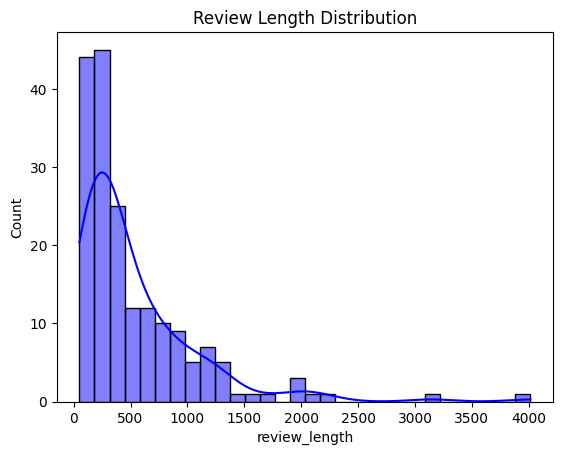

None


In [16]:
print(TextLengthDistribution().execute(df))

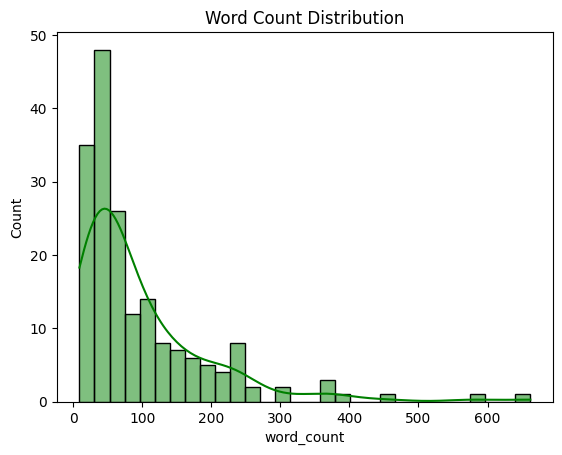

None


In [17]:
print(WordCountDistribution().execute(df))

C:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\src\visualization\eda_visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, x='Frequency', y='Word', palette='coolwarm')


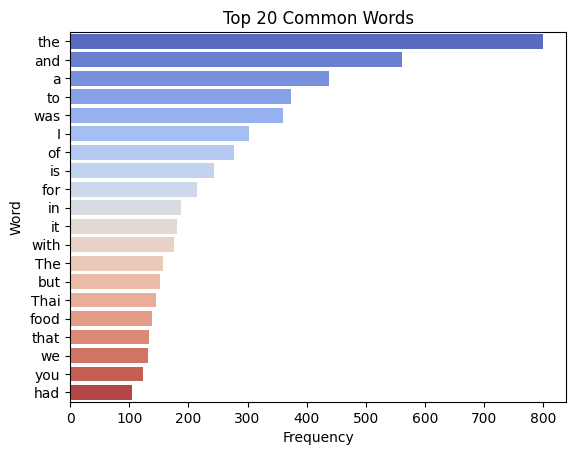

None


In [18]:
print(CommonWordsDistribution().execute(df))


In [19]:
df

,text,rating,date,location,review_length,word_count
108,Delicious Thai restaurant! If you're looking ...,5,"Dec 4, 2024","Temecula, CA",198,33
119,"Came here on Valentine, and the foods were goo...",3,"Feb 15, 2025","Jacksonville, FL",485,82
131,unfortunately my husband reacts to msg (ajinom...,1,"Oct 25, 2024","Kailua, HI",733,131
143,Food was delicious...the only drawback is the ...,4,"Jan 7, 2025","San Rafael, CA",165,26
155,Great place for Thai food and just as long as ...,4,"Feb 6, 2024","San Clemente, CA",345,69
...,...,...,...,...,...,...
8179,"If I ever come back to Sydney, this place is a...",4,"Jan 13, 2017","Brampton, Canada",1284,238
8191,Our local friend recommend us this pearl in Sy...,5,"Apr 16, 2019","San Jose, CA",261,42
8203,I've been dying to come here - had it bookmark...,4,"May 17, 2016","Winnipeg, Canada",1973,361
8215,Excellent thai restaurant in the city !!! Loca...,4,"Jun 18, 2016","Sydney, Australia",217,40


In [20]:
df.loc[108]

text             Delicious Thai restaurant!  If you're looking ...
rating                                                          5 
date                                                   Dec 4, 2024
location                                              Temecula, CA
review_length                                                  198
word_count                                                      33
Name: 108, dtype: object

### Saving the initially cleaned dataset

In [21]:
df.to_csv('../data/cleaned/cleaned_reviews.csv', index=False)